# 1- Time Series Exploration

## Import Library

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np

## Make DataFrame

In [2]:
# first day
series = pd.read_csv('20160930_203718.csv',header=0, index_col=0, squeeze=True)
diff_1 = series.diff(periods=1).iloc[1:]
diff_2 = diff_1.diff(periods=1).iloc[1:]

# second day
series_2 = pd.read_csv('20161001_231809.csv', header=0, index_col=0, squeeze=True)

In [3]:
series

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
Time (s),,,,,,,,,,,,,,,,,,,
0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90908.545,0.0,62.3000,26.5800,0.0000,0.2000,5.5429,2.5713,10.3815,18.5796,36.4589,34.4549,38.3745,57.5888,45.7953,56.6351,56.4058,50.6129,43.0232,65.2822
90908.853,0.0,62.3000,26.5800,0.0000,0.2000,4.5527,2.1454,8.5494,18.0592,36.6290,34.0052,37.6964,51.9752,45.0239,58.9374,61.6173,50.9361,43.4604,63.8761
90909.162,0.0,62.3000,26.5800,0.0000,0.2000,3.7374,1.8492,7.1062,18.0087,36.0127,32.5056,37.1882,54.4724,45.0239,59.7462,57.1452,51.8182,42.5944,64.3090


In [4]:
diff_1

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
Time (s),,,,,,,,,,,,,,,,,,,
0.309,0.0,6.0866,2.9016,8.3586,-0.6881,1.9083,4.7187,8.6076,5.4705,8.1938,9.1320,11.6411,20.6526,14.7422,22.3632,27.6363,29.5049,25.1699,33.2782
0.618,0.0,0.0000,0.0000,-0.2435,-0.0042,8.4004,17.2060,27.5066,11.4660,23.6232,25.7391,28.9429,27.7666,15.5631,33.4509,22.5261,22.2019,16.0750,21.0269
0.926,0.0,0.0000,0.0000,-0.2427,-0.0028,19.0431,26.9499,28.3683,8.3599,25.3143,31.1970,25.4318,9.5329,5.0288,8.3543,13.2074,10.0483,2.5475,1.8927
1.234,0.0,0.0000,0.0000,-0.2340,-0.0012,19.9362,17.5257,12.1999,1.8178,13.3885,12.4344,11.8567,3.2561,2.8450,2.0609,-4.7402,-17.5081,2.4723,2.0082
1.544,0.0,0.0000,0.0000,-0.0760,-0.0010,10.5972,7.3076,3.6783,1.8345,1.1911,3.2003,0.6671,-4.4973,-0.3789,-3.0460,5.7750,14.0702,-2.4723,-3.4804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90908.545,0.0,0.0000,0.0000,0.0000,0.0000,-1.2962,-0.5597,-2.2349,0.1415,-1.8046,-3.0242,-0.5084,4.2333,-0.2319,-4.4050,-6.0922,-2.4682,0.1960,0.9732
90908.853,0.0,0.0000,0.0000,0.0000,0.0000,-0.9902,-0.4259,-1.8321,-0.5204,0.1701,-0.4497,-0.6781,-5.6136,-0.7714,2.3023,5.2115,0.3232,0.4372,-1.4061
90909.162,0.0,0.0000,0.0000,0.0000,0.0000,-0.8153,-0.2962,-1.4432,-0.0505,-0.6163,-1.4996,-0.5082,2.4972,0.0000,0.8088,-4.4721,0.8821,-0.8660,0.4329


In [5]:
diff_2

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
Time (s),,,,,,,,,,,,,,,,,,,
0.618,0.0,-6.0866,-2.9016,-8.6021,0.6839,6.4921,12.4873,18.8990,5.9955,15.4294,16.6071,17.3018,7.1140,0.8209,11.0877,-5.1102,-7.3030,-9.0949,-12.2513
0.926,0.0,0.0000,0.0000,0.0008,0.0014,10.6427,9.7439,0.8617,-3.1061,1.6911,5.4579,-3.5111,-18.2337,-10.5343,-25.0966,-9.3187,-12.1536,-13.5275,-19.1342
1.234,0.0,0.0000,0.0000,0.0087,0.0016,0.8931,-9.4242,-16.1684,-6.5421,-11.9258,-18.7626,-13.5751,-6.2768,-2.1838,-6.2934,-17.9476,-27.5564,-0.0752,0.1155
1.544,0.0,0.0000,0.0000,0.1580,0.0002,-9.3390,-10.2181,-8.5216,0.0167,-12.1974,-9.2341,-11.1896,-7.7534,-3.2239,-5.1069,10.5152,31.5783,-4.9446,-5.4886
1.854,0.0,0.0000,0.0000,0.0001,0.0000,-6.6035,-7.3076,-8.7135,-3.4518,-1.7373,-7.9112,-2.1205,6.2175,1.5374,2.0895,-12.0274,-17.1011,2.7417,6.4010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90908.545,0.0,0.0000,0.0000,0.0000,0.0000,0.3454,0.2508,0.3670,0.5816,-1.1103,-3.0242,1.3437,7.2936,-0.2319,-6.9399,-11.0337,-3.7311,1.2753,1.5005
90908.853,0.0,0.0000,0.0000,0.0000,0.0000,0.3060,0.1338,0.4028,-0.6619,1.9747,2.5745,-0.1697,-9.8469,-0.5395,6.7073,11.3037,2.7914,0.2412,-2.3793
90909.162,0.0,0.0000,0.0000,0.0000,0.0000,0.1749,0.1297,0.3889,0.4699,-0.7864,-1.0499,0.1699,8.1108,0.7714,-1.4935,-9.6836,0.5589,-1.3032,1.8390


## Descriptive statistics and plotting of the main time series

### Descriptive statistics

In [6]:
series.describe()

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
count,295719.000000,295719.000000,295719.000000,295719.000000,295719.000000,295719.000000,295719.000000,295719.000000,295719.000000,295719.000000,295719.000000,295719.000000,295719.000000,295719.000000,295719.000000,295719.000000,295719.000000,295719.000000,295719.000000
mean,9.900786,45.966022,26.476381,239.942669,0.355293,14.962249,17.396103,22.233080,18.429670,31.054371,28.773424,31.675358,25.705773,21.295420,25.224047,27.087685,24.833538,21.742677,27.978418
std,6.429229,12.315889,0.211647,1.947498,0.288663,22.368187,26.648398,28.695365,15.210454,26.675759,27.238787,27.594177,18.652030,16.050916,20.224830,20.191156,18.278996,16.783496,21.642733
min,0.000000,17.500000,23.718400,0.000000,0.199000,0.031500,0.056000,0.054000,0.040200,0.048900,0.048500,0.053400,0.033000,0.029200,0.036600,0.031000,0.032700,0.033000,0.031400
25%,4.440000,36.170000,26.300000,239.895800,0.200000,0.404800,0.484100,0.586300,2.068300,1.785200,1.582800,1.884400,11.291500,8.375700,7.448500,10.255300,9.384700,7.514900,9.499800
50%,8.890000,46.670000,26.460000,239.972900,0.200000,1.644100,1.356100,4.055400,18.579600,32.317000,22.990300,31.405400,25.808100,20.664100,23.121100,26.853300,24.903000,20.661400,26.279500
75%,15.560000,55.330000,26.620000,240.046200,0.207000,25.159500,28.860100,45.099400,29.209800,50.562000,49.605500,52.417400,39.041300,32.778100,39.319400,41.334400,38.116600,33.397600,43.436200
max,20.000000,71.960000,26.940000,275.180300,0.901000,113.486800,154.629000,182.343300,91.822600,124.194900,138.201900,151.012000,102.826500,84.987700,134.999000,108.852100,90.289400,75.413500,108.663300


In [7]:
diff_1.describe()

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
count,2.957180e+05,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000,295718.000000
mean,1.351559e-20,0.000042,0.000010,-0.000789,-0.000002,0.000008,0.000003,0.000013,0.000055,0.000115,0.000095,0.000112,0.000192,0.000141,0.000190,0.000178,0.000157,0.000120,0.000132
std,8.930873e-02,0.034183,0.005847,0.575718,0.108911,4.676410,5.480137,6.087633,3.135198,6.070864,5.917643,6.067472,4.837968,3.627037,4.773872,5.176312,4.509728,3.862499,5.024149
min,-6.100000e+00,-0.337900,-0.024800,-74.245700,-0.689900,-51.260800,-52.464400,-92.507600,-53.082700,-75.429900,-75.348400,-76.923900,-71.864300,-53.311100,-65.767100,-68.470700,-57.651700,-54.730500,-75.179800
25%,0.000000e+00,0.000000,0.000000,-0.032400,0.000000,-1.736575,-1.787375,-2.124800,-0.781300,-1.741000,-1.777100,-1.746700,-0.662975,-0.372800,-0.506500,-0.506800,-0.394700,-0.324700,-0.418000
50%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.072500,-0.047350,-0.161300,-0.268200,-0.464800,-0.600600,-0.649700,0.000000,-0.034700,0.000000,0.000000,-0.007900,-0.012200,-0.000100
75%,0.000000e+00,0.000000,0.000000,0.032600,0.000000,0.001000,0.000300,0.001400,0.001100,0.001800,0.000700,0.001500,0.558000,0.048700,0.322300,0.655800,0.070600,0.060950,0.199100
max,6.200000e+00,6.086600,2.901600,72.146900,0.686300,47.335600,75.028800,103.200600,41.398400,55.322700,78.025800,65.787100,48.384600,36.723100,66.669700,55.963200,45.413100,41.169700,48.199800


In [8]:
diff_2.describe()

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
count,2.957170e+05,295717.000000,295717.000000,295717.000000,295717.000000,295717.000000,2.957170e+05,295717.000000,295717.000000,295717.000000,295717.000000,295717.000000,295717.000000,295717.000000,295717.000000,295717.000000,295717.000000,295717.000000,295717.000000
mean,-1.877171e-22,-0.000021,-0.000010,-0.000028,0.000002,-0.000008,-1.655908e-05,-0.000032,-0.000021,-0.000036,-0.000035,-0.000042,-0.000049,-0.000058,-0.000074,-0.000108,-0.000096,-0.000087,-0.000162
std,6.131940e-02,0.024573,0.005575,0.467446,0.150198,3.248783,4.057461e+00,5.114789,3.038522,6.025787,5.109451,5.342752,6.300941,4.355610,5.904175,6.813706,5.330232,4.609731,6.195785
min,-5.920000e+00,-6.086600,-2.901600,-63.369400,-0.690900,-68.367400,-1.274932e+02,-195.614000,-60.798100,-90.092000,-132.317000,-136.936000,-92.071200,-60.909900,-123.430800,-82.533100,-62.800400,-55.916900,-96.769200
25%,0.000000e+00,0.000000,0.000000,-0.005600,-0.000200,-0.000400,-2.775558e-17,-0.000300,-0.390300,-0.746900,-0.353500,-0.489100,-0.997600,-0.389100,-0.711000,-1.128200,-0.403400,-0.306900,-0.492300
50%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.005400,4.100000e-03,0.009600,0.000300,0.000900,0.005800,0.000800,0.000100,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000e+00,0.000000,0.000000,0.005700,0.000300,0.202800,2.456000e-01,0.322000,0.395300,0.940500,0.474000,0.613700,1.029300,0.375000,0.664600,1.053000,0.356200,0.278300,0.436800
max,5.940000e+00,0.662700,0.017800,87.684400,0.686800,88.333500,8.179660e+01,99.315000,50.999200,89.566300,84.918800,94.084400,66.459300,53.252100,68.249600,67.644800,57.420500,54.408700,72.218100


### CO concentration

#### Plotting


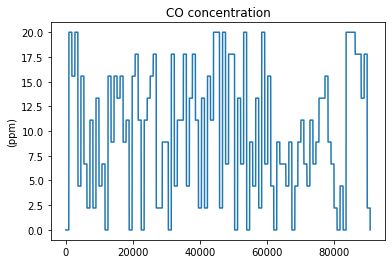

In [9]:
plt.plot(series.index, series['CO (ppm)'])
plt.title('CO concentration')
plt.ylabel('(ppm)')
plt.show()

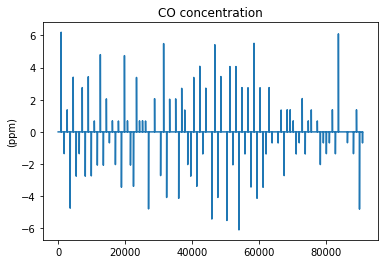

In [10]:
plt.plot(diff_1.index, diff_1['CO (ppm)'])
plt.title('CO concentration')
plt.ylabel('(ppm)')
plt.show()

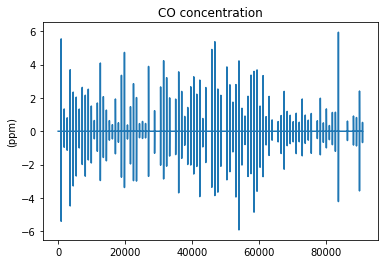

In [11]:
plt.plot(diff_2.index, diff_2['CO (ppm)'])
plt.title('CO concentration')
plt.ylabel('(ppm)')
plt.show()

#### ACF

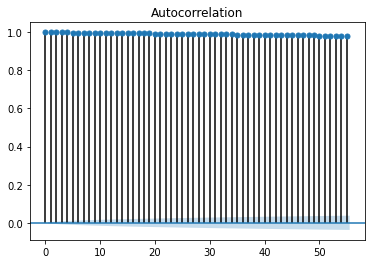

In [12]:
plot_acf(series['CO (ppm)'])
plt.show()

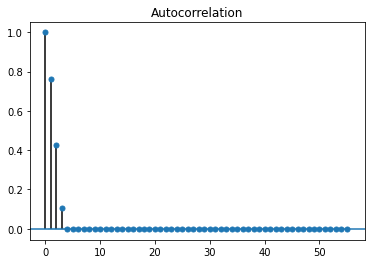

In [13]:
plot_acf(diff_1['CO (ppm)'])
plt.show()

#### PACF

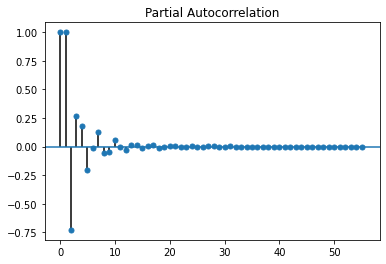

In [14]:
plot_pacf(series['CO (ppm)'])
plt.show()

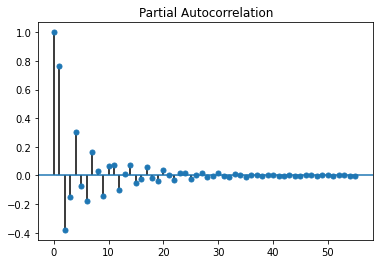

In [15]:
plot_pacf(diff_1['CO (ppm)'])
plt.show()

The ACF of first order differenced CO concentration declined sharply. And PACF of first order differnced one declined relatively slow. 
Therefore, we can think it has characteristic of MA model. From that reason, we will use ARIMA(0,1,1).  

### Humidity

#### Plotting

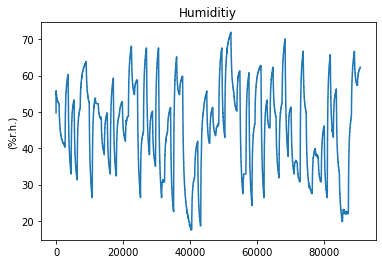

In [18]:
plt.plot(series.index, series['Humidity (%r.h.)'])
plt.title('Humiditiy')
plt.ylabel('(%r.h.)')
plt.show()

#### ACF

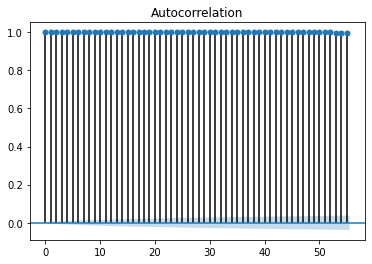

In [19]:
plot_acf(series['Humidity (%r.h.)'])
plt.show()

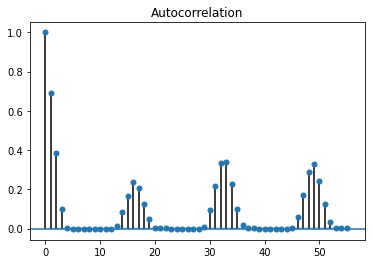

In [20]:
plot_acf(diff_1['Humidity (%r.h.)'])
plt.show()

#### PACF

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


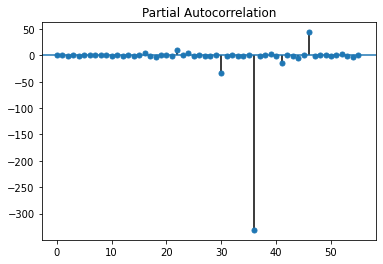

In [21]:
plot_pacf(series['Humidity (%r.h.)'])
plt.show()

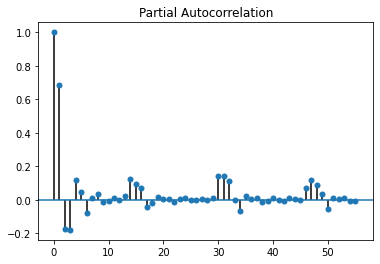

In [22]:
plot_pacf(diff_1['Humidity (%r.h.)'])
plt.show()

The PACF of first order differnced one declined sharper than ACF. Therefore, we can think it has characteristic of AR model. From that reason, we will use ARIMA(1,1,0).  

### Temperature

#### Plotting

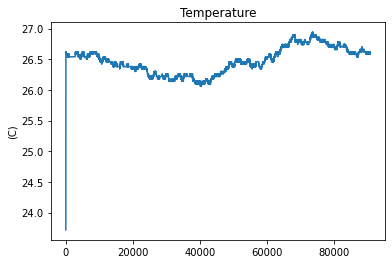

In [105]:
plt.plot(series.index, series['Temperature (C)'])
plt.title('Temperature')
plt.ylabel('(C)')
plt.show()

#### ACF

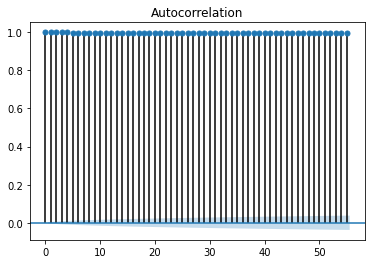

In [106]:
plot_acf(series['Temperature (C)'])
plt.show()

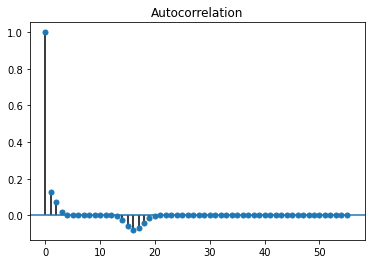

In [107]:
plot_acf(diff_1['Temperature (C)'])
plt.show()

#### PACF

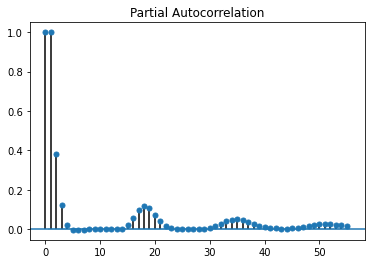

In [108]:
plot_pacf(series['Temperature (C)'])
plt.show()

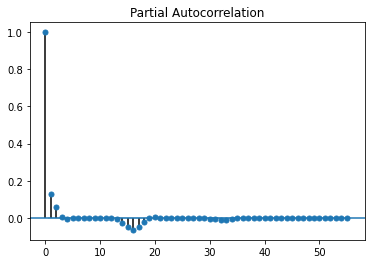

In [109]:
plot_pacf(diff_1['Temperature (C)'])
plt.show()

Without differencing, the ACF shows almost identical value, PACF declined sharply.Therefore, we can think it has characteristic of AR model. From that reason, we will use ARIMA(1,0,0).  

### Flow rate

#### Plotting

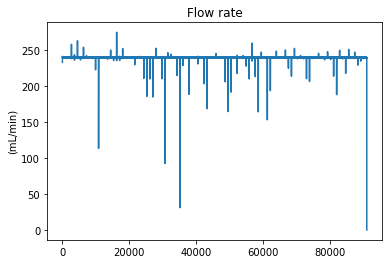

In [110]:
plt.plot(series.index, series['Flow rate (mL/min)'])
plt.title('Flow rate')
plt.ylabel('(mL/min)')
plt.show()

#### ACF

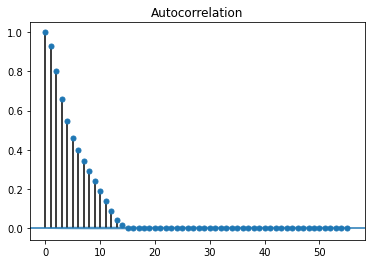

In [111]:
plot_acf(series['Flow rate (mL/min)'])
plt.show()

#### PACF

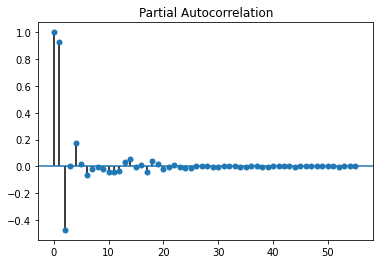

In [112]:
plot_pacf(series['Flow rate (mL/min)'])
plt.show()

Without differencing, the PACF declined sharper than ACF. Therefore, we can think it has characteristic of AR model. From that reason, we will use ARIMA(1,0,0).  

### Heater voltage

#### Plotting

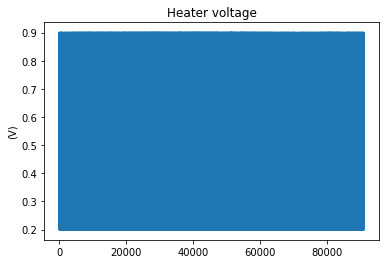

In [113]:
plt.plot(series.index, series['Heater voltage (V)'])
plt.title('Heater voltage')
plt.ylabel('(V)')
plt.show()

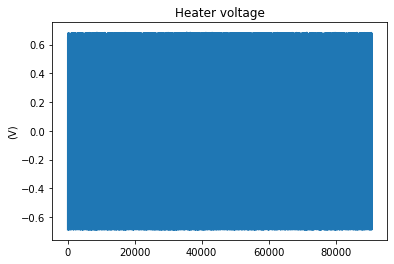

In [114]:
plt.plot(diff_1.index, diff_1['Heater voltage (V)'])
plt.title('Heater voltage')
plt.ylabel('(V)')
plt.show()

#### ACF

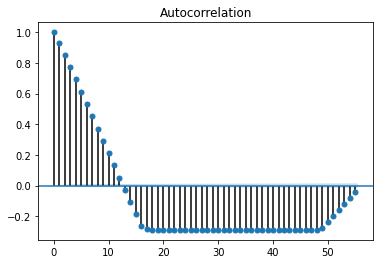

In [24]:
plot_acf(series['Heater voltage (V)'])
plt.show()

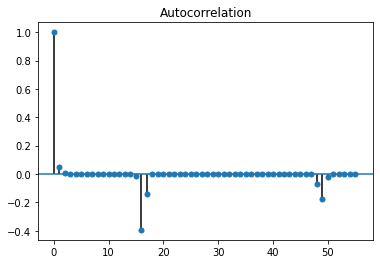

In [25]:
plot_acf(diff_1['Heater voltage (V)'])
plt.show()

#### PACF

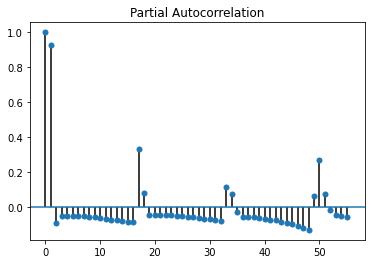

In [26]:
plot_pacf(series['Heater voltage (V)'])
plt.show()

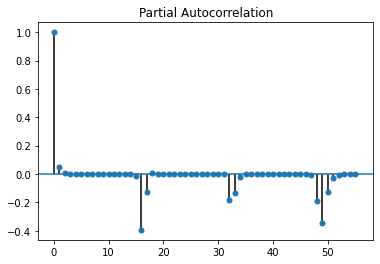

In [27]:
plot_pacf(diff_1['Heater voltage (V)'])
plt.show()

Without differencing, the PACF declined sharper than ACF. Therefore, we can think it has characteristic of AR model. From that reason, we will use ARIMA(1,0,0).  

# 2- Univariate Time-series Models
I will use ARIMA. From step 1, I found that the appropriate parameters for CO concentration and temperature are ARIMA(0,1,1), ARIMA(1,0,0), respectively. 

### CO concentration

#### First day

In [28]:
arima_co_1 = ARIMA(series['CO (ppm)'], order=(0,1,1))
arima_co_1_fit = arima_co_1.fit(trend='nc', full_output=True, disp=1)
print(arima_co_1_fit.summary())

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                             ARIMA Model Results                              
Dep. Variable:             D.CO (ppm)   No. Observations:               295718
Model:                 ARIMA(0, 1, 1)   Log Likelihood              387342.526
Method:                       css-mle   S.D. of innovations              0.065
Date:                Tue, 09 Jun 2020   AIC                        -774681.052
Time:                        17:26:20   BIC                        -774659.857
Sample:                             1   HQIC                       -774674.918
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
ma.L1.D.CO (ppm)     0.6457      0.001    623.314      0.000       0.644       0.648
                                    Roots                                    
                  Real          Ima

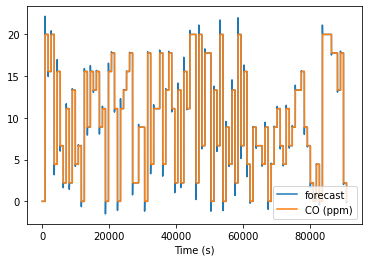

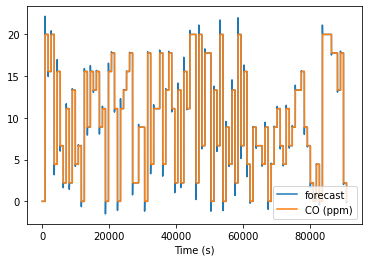

In [29]:
arima_co_1_fit.plot_predict()

In [125]:
arima_co_1 = ARIMA(series['CO (ppm)'], order=(1,0,0))
arima_co_1_fit = arima_co_1.fit(trend='nc', full_output=True, disp=1)
print(arima_co_1_fit.summary())

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                              ARMA Model Results                              
Dep. Variable:               CO (ppm)   No. Observations:               295719
Model:                     ARMA(1, 0)   Log Likelihood              294746.568
Method:                       css-mle   S.D. of innovations              0.089
Date:                Tue, 09 Jun 2020   AIC                        -589489.136
Time:                        23:00:00   BIC                        -589467.941
Sample:                             0   HQIC                       -589483.002
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.CO (ppm)     1.0000   1.33e-05   7.53e+04      0.000       1.000       1.000
                                    Roots                                    
                  Real          Imaginary

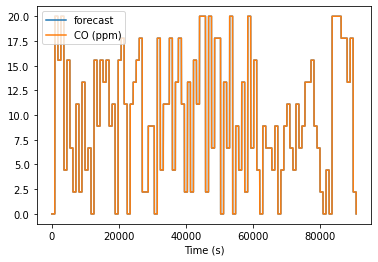

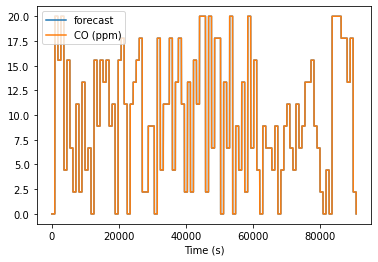

In [126]:
arima_co_1_fit.plot_predict()

In [127]:
arima_co_1 = ARIMA(series['CO (ppm)'], order=(0,0,1))
arima_co_1_fit = arima_co_1.fit(trend='nc', full_output=True, disp=1)
print(arima_co_1_fit.summary())

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                              ARMA Model Results                              
Dep. Variable:               CO (ppm)   No. Observations:               295719
Model:                     ARMA(0, 1)   Log Likelihood             -945160.933
Method:                       css-mle   S.D. of innovations              5.913
Date:                Tue, 09 Jun 2020   AIC                        1890325.865
Time:                        23:00:33   BIC                        1890347.060
Sample:                             0   HQIC                       1890331.999
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ma.L1.CO (ppm)     0.9982   7.77e-05   1.28e+04      0.000       0.998       0.998
                                    Roots                                    
                  Real          Imaginary

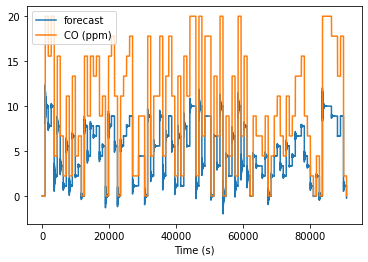

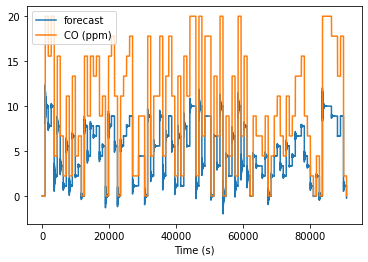

In [128]:
arima_co_1_fit.plot_predict()

In [129]:
arima_co_1 = ARIMA(series['CO (ppm)'], order=(0,1,2))
arima_co_1_fit = arima_co_1.fit(trend='nc', full_output=True, disp=1)
print(arima_co_1_fit.summary())

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                             ARIMA Model Results                              
Dep. Variable:             D.CO (ppm)   No. Observations:               295718
Model:                 ARIMA(0, 1, 2)   Log Likelihood              464415.703
Method:                       css-mle   S.D. of innovations              0.050
Date:                Tue, 09 Jun 2020   AIC                        -928825.407
Time:                        23:01:19   BIC                        -928793.615
Sample:                             1   HQIC                       -928816.206
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
ma.L1.D.CO (ppm)     0.7984      0.001    665.259      0.000       0.796       0.801
ma.L2.D.CO (ppm)     0.8117      0.001    680.563      0.000       0.809       0.814
                            

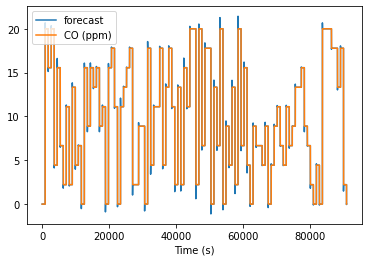

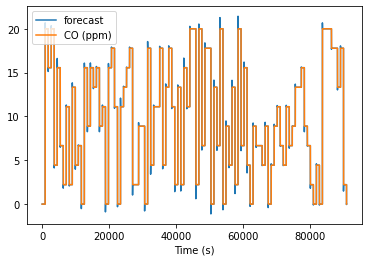

In [130]:
arima_co_1_fit.plot_predict()

#### Second day

In [30]:
arima_co_2 = ARIMA(series_2['CO (ppm)'], order=(0,1,1))
arima_co_2_fit = arima_co_2.fit(trend='nc', full_output=True, disp=1)
print(arima_co_2_fit.summary())

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                             ARIMA Model Results                              
Dep. Variable:             D.CO (ppm)   No. Observations:               295515
Model:                 ARIMA(0, 1, 1)   Log Likelihood              389802.185
Method:                       css-mle   S.D. of innovations              0.065
Date:                Tue, 09 Jun 2020   AIC                        -779600.369
Time:                        17:26:24   BIC                        -779579.176
Sample:                             1   HQIC                       -779594.236
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
ma.L1.D.CO (ppm)     0.6548      0.001    637.779      0.000       0.653       0.657
                                    Roots                                    
                  Real          Ima

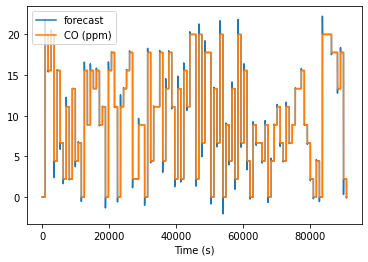

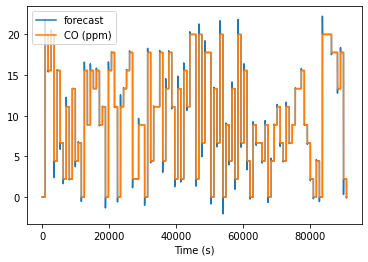

In [31]:
arima_co_2_fit.plot_predict()

In [131]:
arima_co_2 = ARIMA(series_2['CO (ppm)'], order=(0,1,2))
arima_co_2_fit = arima_co_2.fit(trend='nc', full_output=True, disp=1)
print(arima_co_2_fit.summary())

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                             ARIMA Model Results                              
Dep. Variable:             D.CO (ppm)   No. Observations:               295515
Model:                 ARIMA(0, 1, 2)   Log Likelihood              468091.516
Method:                       css-mle   S.D. of innovations              0.050
Date:                Tue, 09 Jun 2020   AIC                        -936177.032
Time:                        23:06:05   BIC                        -936145.243
Sample:                             1   HQIC                       -936167.832
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
ma.L1.D.CO (ppm)     0.8008      0.001    671.995      0.000       0.798       0.803
ma.L2.D.CO (ppm)     0.8240      0.001    697.877      0.000       0.822       0.826
                            

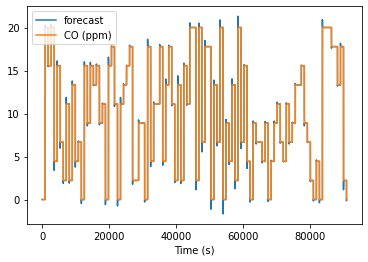

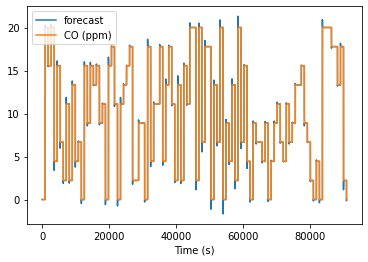

In [132]:
arima_co_2_fit.plot_predict()

The CO cocentrations of first and second day are almost identical. AIC and BIC values also very similar. Therefore, we can infer that CO concentration is kind of seasonal component.

### Temperature

#### First day

In [32]:
arima_temp_1 = ARIMA(series['Temperature (C)'], order=(1,0,0))
arima_temp_1_fit = arima_temp_1.fit(trend='nc', full_output=True, disp=1)
print(arima_temp_1_fit.summary())

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                              ARMA Model Results                              
Dep. Variable:        Temperature (C)   No. Observations:               295719
Model:                     ARMA(1, 0)   Log Likelihood             1100911.355
Method:                       css-mle   S.D. of innovations              0.006
Date:                Tue, 09 Jun 2020   AIC                       -2201818.710
Time:                        17:26:30   BIC                       -2201797.516
Sample:                             0   HQIC                      -2201812.576
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ar.L1.Temperature (C)     1.0000   4.06e-07   2.46e+06      0.000       1.000       1.000
                                    Roots                                    
                  Re

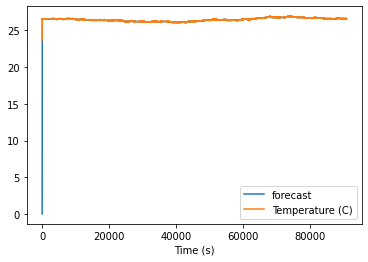

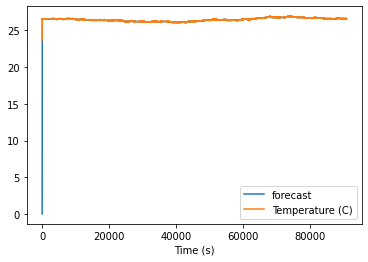

In [33]:
arima_temp_1_fit.plot_predict()

In [133]:
arima_temp_1 = ARIMA(series['Temperature (C)'], order=(1,1,0))
arima_temp_1_fit = arima_temp_1.fit(trend='nc', full_output=True, disp=1)
print(arima_temp_1_fit.summary())

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                             ARIMA Model Results                              
Dep. Variable:      D.Temperature (C)   No. Observations:               295718
Model:                 ARIMA(1, 1, 0)   Log Likelihood             1116440.000
Method:                       css-mle   S.D. of innovations              0.006
Date:                Tue, 09 Jun 2020   AIC                       -2232876.000
Time:                        23:10:15   BIC                       -2232854.806
Sample:                             1   HQIC                      -2232869.866
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ar.L1.D.Temperature (C)     0.7719      0.004    180.943      0.000       0.764       0.780
                                    Roots                                    
              

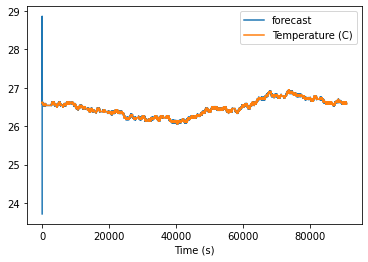

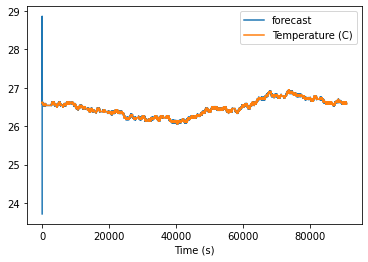

In [134]:
arima_temp_1_fit.plot_predict()

In [135]:
arima_temp_1 = ARIMA(series['Temperature (C)'], order=(2,1,0))
arima_temp_1_fit = arima_temp_1.fit(trend='nc', full_output=True, disp=1)
print(arima_temp_1_fit.summary())

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                             ARIMA Model Results                              
Dep. Variable:      D.Temperature (C)   No. Observations:               295718
Model:                 ARIMA(2, 1, 0)   Log Likelihood             1118336.870
Method:                       css-mle   S.D. of innovations              0.006
Date:                Tue, 09 Jun 2020   AIC                       -2236667.741
Time:                        23:11:20   BIC                       -2236635.949
Sample:                             1   HQIC                      -2236658.540
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ar.L1.D.Temperature (C)     1.0899      0.007    163.463      0.000       1.077       1.103
ar.L2.D.Temperature (C)    -0.4120      0.007    -61.792      0.000      -0.425      -0.399


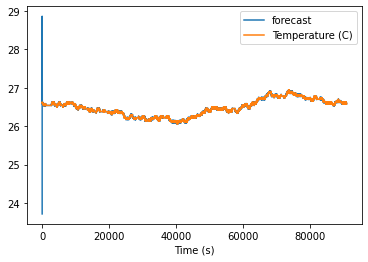

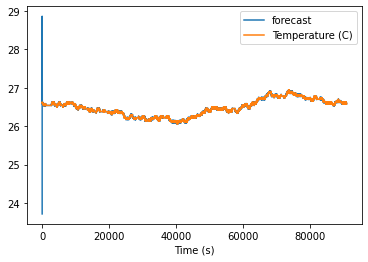

In [136]:
arima_temp_1_fit.plot_predict()

In [137]:
arima_temp_1 = ARIMA(series['Temperature (C)'], order=(0,0,1))
arima_temp_1_fit = arima_temp_1.fit(trend='nc', full_output=True, disp=1)
print(arima_temp_1_fit.summary())

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


                              ARMA Model Results                              
Dep. Variable:        Temperature (C)   No. Observations:               295719
Model:                     ARMA(0, 1)   Log Likelihood            -1183499.176
Method:                       css-mle   S.D. of innovations             13.239
Date:                Tue, 09 Jun 2020   AIC                        2367002.352
Time:                        23:12:09   BIC                        2367023.547
Sample:                             0   HQIC                       2367008.486
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ma.L1.Temperature (C)     1.0000   2.85e-05   3.51e+04      0.000       1.000       1.000
                                    Roots                                    
                  Re

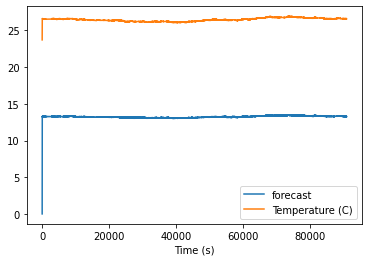

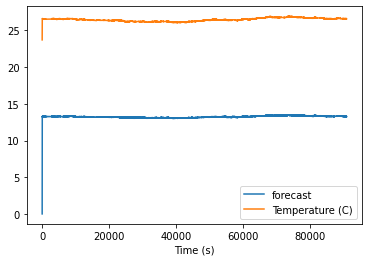

In [138]:
arima_temp_1_fit.plot_predict()

#### Second day

In [34]:
arima_temp_2 = ARIMA(series_2['Temperature (C)'], order=(1,0,0))
arima_temp_2_fit = arima_temp_2.fit(trend='nc', full_output=True, disp=1)
print(arima_temp_2_fit.summary())

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                              ARMA Model Results                              
Dep. Variable:        Temperature (C)   No. Observations:               295516
Model:                     ARMA(1, 0)   Log Likelihood             1368659.665
Method:                       css-mle   S.D. of innovations              0.002
Date:                Tue, 09 Jun 2020   AIC                       -2737315.331
Time:                        17:26:32   BIC                       -2737294.138
Sample:                             0   HQIC                      -2737309.197
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ar.L1.Temperature (C)     1.0000   1.64e-07   6.09e+06      0.000       1.000       1.000
                                    Roots                                    
                  Re

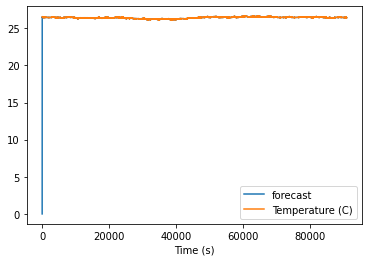

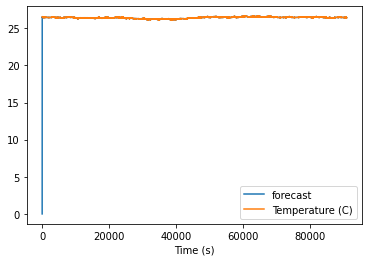

In [35]:
arima_temp_2_fit.plot_predict()

In [139]:
arima_temp_2 = ARIMA(series_2['Temperature (C)'], order=(2,1,0))
arima_temp_2_fit = arima_temp_2.fit(trend='nc', full_output=True, disp=1)
print(arima_temp_2_fit.summary())

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                             ARIMA Model Results                              
Dep. Variable:      D.Temperature (C)   No. Observations:               295515
Model:                 ARIMA(2, 1, 0)   Log Likelihood             1529661.650
Method:                       css-mle   S.D. of innovations              0.001
Date:                Tue, 09 Jun 2020   AIC                       -3059317.299
Time:                        23:13:45   BIC                       -3059285.510
Sample:                             1   HQIC                      -3059308.099
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ar.L1.D.Temperature (C)     1.0878      0.002    647.945      0.000       1.084       1.091
ar.L2.D.Temperature (C)    -0.4088      0.002   -243.521      0.000      -0.412      -0.406


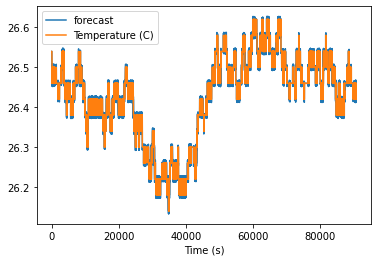

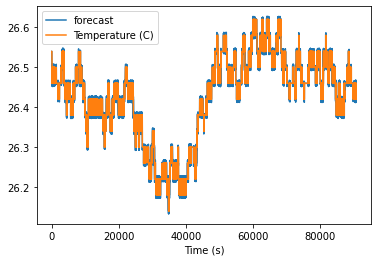

In [140]:
arima_temp_2_fit.plot_predict()

Different from first day, it is fitted more accurately. I think noise in the first day's starting point affects this. 

# 3- Multivariate Time-series Models

I will use VAR

### First day

##### first round

In [36]:
first_component = series[['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)']]
first_component

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V)
Time (s),,,,,
0.000,0.0,49.7534,23.7184,233.2737,0.8993
0.309,0.0,55.8400,26.6200,241.6323,0.2112
0.618,0.0,55.8400,26.6200,241.3888,0.2070
0.926,0.0,55.8400,26.6200,241.1461,0.2042
1.234,0.0,55.8400,26.6200,240.9121,0.2030
...,...,...,...,...,...
90908.545,0.0,62.3000,26.5800,0.0000,0.2000
90908.853,0.0,62.3000,26.5800,0.0000,0.2000
90909.162,0.0,62.3000,26.5800,0.0000,0.2000


In [38]:
var_d1_1 = VAR(first_component)
var_d1_1_fit = var_d1_1.fit(maxlags=2)
var_d1_1_fit.summary()

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Jun, 2020
Time:                     17:26:51
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -31.9327
Nobs:                     295717.    HQIC:                  -31.9341
Log likelihood:       2.62385e+06    FPE:                1.35187e-14
AIC:                     -31.9347    Det(Omega_mle):     1.35162e-14
--------------------------------------------------------------------
Results for equation CO (ppm)
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.047705         0.019254            2.478           0.013
L1.CO (ppm)                   1.764210         0.001186         1487.655           0.000
L1.Humidity (%r.h.)      

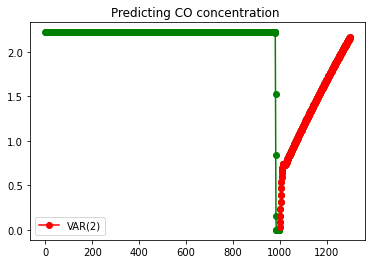

<Figure size 864x1440 with 0 Axes>

In [39]:
old1 = var_d1_1_fit.model.endog[-1000:,0]
forecast1 = var_d1_1_fit.forecast(var_d1_1_fit.model.endog, 300)[:,0]
plt.plot(np.r_[old1, forecast1], 'go-')
plt.title('Predicting CO concentration ')
plt.plot(np.r_[np.nan * np.ones_like(old1), forecast1], 'ro-', label="VAR(2)")
plt.legend(loc="lower left")
plt.figure(figsize=(12, 20))
plt.show()

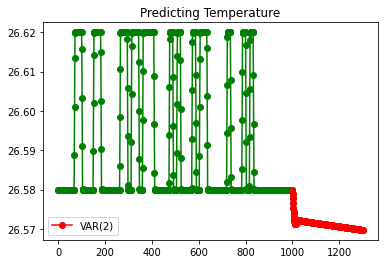

<Figure size 864x1440 with 0 Axes>

In [40]:
old1 = var_d1_1_fit.model.endog[-1000:,2]
forecast1 = var_d1_1_fit.forecast(var_d1_1_fit.model.endog, 300)[:,2]
plt.plot(np.r_[old1, forecast1], 'go-')
plt.title('Predicting Temperature')
plt.plot(np.r_[np.nan * np.ones_like(old1), forecast1], 'ro-', label="VAR(2)")
plt.legend(loc="lower left")
plt.figure(figsize=(12, 20))
plt.show()

#### second round

In [42]:
var_d1_2 = VAR(series)
var_d1_2_fit = var_d1_2.fit(maxlags=2)
var_d1_2_fit.summary()

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Jun, 2020
Time:                     17:27:11
--------------------------------------------------------------------
No. of Equations:         19.0000    BIC:                   -16.7686
Nobs:                     295717.    HQIC:                  -16.7874
Log likelihood:      -5.48844e+06    FPE:                5.08130e-08
AIC:                     -16.7951    Det(Omega_mle):     5.06859e-08
--------------------------------------------------------------------
Results for equation CO (ppm)
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.063327         0.019493            3.249           0.001
L1.CO (ppm)                   1.764362         0.001186         1487.511           0.000
L1.Humidity (%r.h.)      

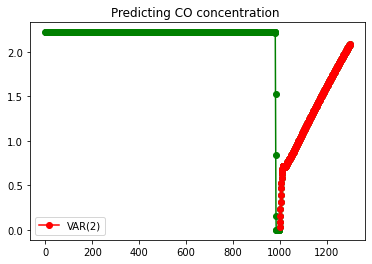

<Figure size 864x1440 with 0 Axes>

In [43]:
old1 = var_d1_2_fit.model.endog[-1000:,0]
forecast1 = var_d1_2_fit.forecast(var_d1_2_fit.model.endog, 300)[:,0]
plt.plot(np.r_[old1, forecast1], 'go-')
plt.title('Predicting CO concentration ')
plt.plot(np.r_[np.nan * np.ones_like(old1), forecast1], 'ro-', label="VAR(2)")
plt.legend(loc="lower left")
plt.figure(figsize=(12, 20))
plt.show()

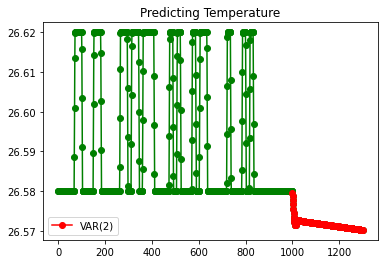

<Figure size 864x1440 with 0 Axes>

In [44]:
old1 = var_d1_1_fit.model.endog[-1000:,2]
forecast1 = var_d1_2_fit.forecast(var_d1_2_fit.model.endog, 300)[:,2]
plt.plot(np.r_[old1, forecast1], 'go-')
plt.title('Predicting Temperature')
plt.plot(np.r_[np.nan * np.ones_like(old1), forecast1], 'ro-', label="VAR(2)")
plt.legend(loc="lower left")
plt.figure(figsize=(12, 20))
plt.show()

### second day

##### first round

In [45]:
first_component_2 = series[['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)']]
first_component_2

,CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V)
Time (s),,,,,
0.000,0.0,49.7534,23.7184,233.2737,0.8993
0.309,0.0,55.8400,26.6200,241.6323,0.2112
0.618,0.0,55.8400,26.6200,241.3888,0.2070
0.926,0.0,55.8400,26.6200,241.1461,0.2042
1.234,0.0,55.8400,26.6200,240.9121,0.2030
...,...,...,...,...,...
90908.545,0.0,62.3000,26.5800,0.0000,0.2000
90908.853,0.0,62.3000,26.5800,0.0000,0.2000
90909.162,0.0,62.3000,26.5800,0.0000,0.2000


In [47]:
var_d2_1 = VAR(first_component_2)
var_d2_1_fit = var_d2_1.fit(maxlags=2)
var_d2_1_fit.summary()

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Jun, 2020
Time:                     17:27:29
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -31.9327
Nobs:                     295717.    HQIC:                  -31.9341
Log likelihood:       2.62385e+06    FPE:                1.35187e-14
AIC:                     -31.9347    Det(Omega_mle):     1.35162e-14
--------------------------------------------------------------------
Results for equation CO (ppm)
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.047705         0.019254            2.478           0.013
L1.CO (ppm)                   1.764210         0.001186         1487.655           0.000
L1.Humidity (%r.h.)      

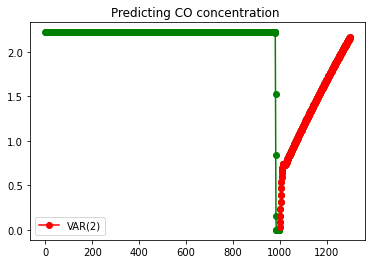

<Figure size 864x1440 with 0 Axes>

In [48]:
old1 = var_d2_1_fit.model.endog[-1000:,0]
forecast1 = var_d2_1_fit.forecast(var_d2_1_fit.model.endog, 300)[:,0]
plt.plot(np.r_[old1, forecast1], 'go-')
plt.title('Predicting CO concentration ')
plt.plot(np.r_[np.nan * np.ones_like(old1), forecast1], 'ro-', label="VAR(2)")
plt.legend(loc="lower left")
plt.figure(figsize=(12, 20))
plt.show()

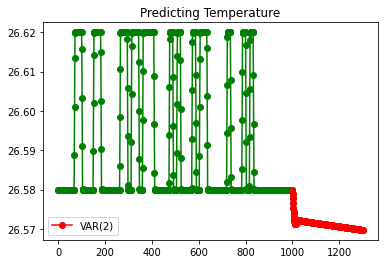

<Figure size 864x1440 with 0 Axes>

In [49]:
old1 = var_d2_1_fit.model.endog[-1000:,2]
forecast1 = var_d2_1_fit.forecast(var_d2_1_fit.model.endog, 300)[:,2]
plt.plot(np.r_[old1, forecast1], 'go-')
plt.title('Predicting Temperature')
plt.plot(np.r_[np.nan * np.ones_like(old1), forecast1], 'ro-', label="VAR(2)")
plt.legend(loc="lower left")
plt.figure(figsize=(12, 20))
plt.show()

#### second round

In [152]:
var_d2_2 = VAR(series_2)
var_d2_2_fit = var_d2_2.fit(maxlags=2)
var_d2_2_fit.summary()

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 10, Jun, 2020
Time:                     00:30:05
--------------------------------------------------------------------
No. of Equations:         19.0000    BIC:                   -16.6473
Nobs:                     295514.    HQIC:                  -16.6662
Log likelihood:      -5.50258e+06    FPE:                5.73617e-08
AIC:                     -16.6739    Det(Omega_mle):     5.72181e-08
--------------------------------------------------------------------
Results for equation CO (ppm)
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.059551         0.032558            1.829           0.067
L1.CO (ppm)                   1.768080         0.001178         1500.689           0.000
L1.Humidity (%r.h.)      

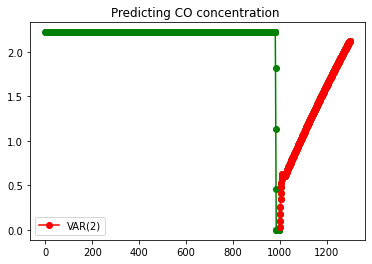

<Figure size 864x1440 with 0 Axes>

In [153]:
old1 = var_d2_2_fit.model.endog[-1000:,0]
forecast1 = var_d2_2_fit.forecast(var_d2_2_fit.model.endog, 300)[:,0]
plt.plot(np.r_[old1, forecast1], 'go-')
plt.title('Predicting CO concentration ')
plt.plot(np.r_[np.nan * np.ones_like(old1), forecast1], 'ro-', label="VAR(2)")
plt.legend(loc="lower left")
plt.figure(figsize=(12, 20))
plt.show()

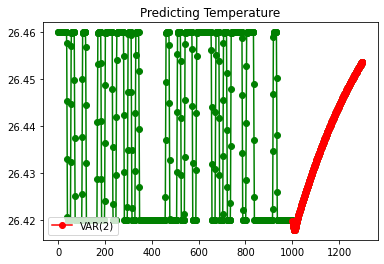

<Figure size 864x1440 with 0 Axes>

In [154]:
old1 = var_d2_2_fit.model.endog[-1000:,2]
forecast1 = var_d2_2_fit.forecast(var_d2_2_fit.model.endog, 300)[:,2]
plt.plot(np.r_[old1, forecast1], 'go-')
plt.title('Predicting Temperature')
plt.plot(np.r_[np.nan * np.ones_like(old1), forecast1], 'ro-', label="VAR(2)")
plt.legend(loc="lower left")
plt.figure(figsize=(12, 20))
plt.show()

There is no difference between first and second day. Also there is no difference between first and second round. 

### Compare with univariate model

In [144]:
mar = ARIMA(series['CO (ppm)'], order=(0,1,1))
resar = mar.fit(trend='nc', full_output=True, disp=1)

mvar = VAR(first_component)
resvar = mvar.fit(maxlags=2)

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


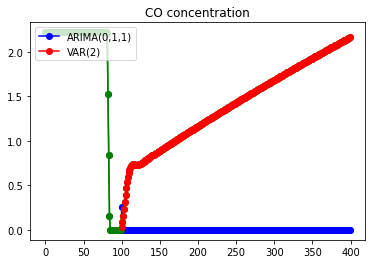

In [145]:
old1 = resvar.model.endog[-100:,0]
forecast1 = resvar.forecast(resvar.model.endog, 300)[:,0]

old = resar.model.endog[-100:]
forecast, stderr, conf_int = resar.forecast(300)

plt.plot(np.r_[old, forecast], 'go-')
plt.plot(np.r_[np.nan * np.ones_like(old), forecast], 'bo-', label="ARIMA(0,1,1)")
plt.title('CO concentration')
plt.plot(np.r_[old1, forecast1], 'go-')
plt.plot(np.r_[np.nan * np.ones_like(old1), forecast1], 'ro-', label="VAR(2)")
plt.legend(loc="upper left")
plt.show()

In [150]:
mar = ARIMA(series['Temperature (C)'], (2,0,0))
resar = mar.fit()

mvar = VAR(first_component)
resvar = mvar.fit(maxlags=2)

/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/taehokim/miniconda3/envs/ada/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


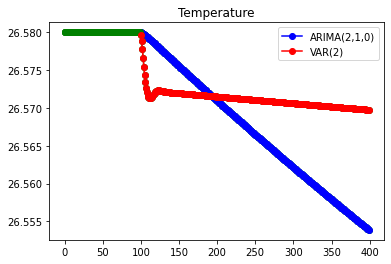

In [151]:
old1 = resvar.model.endog[-100:,2]
forecast1 = resvar.forecast(resvar.model.endog, 300)[:,2]

old = resar.model.endog[-100:]
forecast, stderr, conf_int = resar.forecast(300)

plt.plot(np.r_[old, forecast], 'go-')
plt.plot(np.r_[np.nan * np.ones_like(old), forecast], 'bo-', label="ARIMA(2,1,0)")
plt.title('Temperature')
plt.plot(np.r_[old1, forecast1], 'go-')
plt.plot(np.r_[np.nan * np.ones_like(old1), forecast1], 'ro-', label="VAR(2)")
plt.legend(loc="upper right")
plt.show()